<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [ ]:
NETFLIX_SHOWS = 'https://github.com/evgpat/datasets/raw/refs/heads/main/NetflixShows.xlsx'

In [ ]:
data = pd.read_excel(NETFLIX_SHOWS)
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


#### Удалите из данных дубликаты.
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [ ]:
data['title'].value_counts()

,count
title,
13 Reasons Why,8
Girlboss,7
Prison Break,7
New Girl,6
Pretty Little Liars,6
...,...
Winnie the Pooh: Springtime with Roo,1
Batched,1
Atlantis: Milo's Return,1


Можно заметить, что многие названия фильмов встречаются в датасете неоднократно. Например, сериал "13 Reasons Why" встречается в датасете 8 раз. Отсюда получается такое большое количество дубликатов. Это технические дубликаты, поскольку все дубликаты полностью идентичны.

In [ ]:
data.duplicated().sum()

np.int64(500)

500(!) полностью дублированных строк. Это 50% от всего датасета.

In [ ]:
data.nunique()

,0
title,496
rating,13
ratingLevel,99
release year,35
user rating score,42


Дубликаты в других признаках объяснимы ограниченностью возможных значений. Например, кол-во рейтингов ограничено, как и год выпуска.

In [ ]:
data_clean = data.drop_duplicates()

#### Сколько рейтинговых групп представлено в данных?

In [ ]:
data_clean['rating'].nunique()

13

In [ ]:
data_clean['rating'].value_counts()

,count
rating,
TV-14,106
TV-MA,82
PG,76
G,53
TV-Y,36
TV-PG,33
TV-G,29
TV-Y7-FV,25
TV-Y7,23


Самые популярные рейтинги (топ-5):

- TV-14 — Родительский контроль для зрителей до 14 лет.
- TV-MA (Mature Audiences) — Только для взрослых (17+).
- PG (Parental Guidance Suggested) — Детям рекомендуется смотреть с родителями.
- G (General Audiences) — Для любой аудитории.
- TV-Y — Программа для всех детей.

#### Какие оценки пользователи ставят чаще?

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

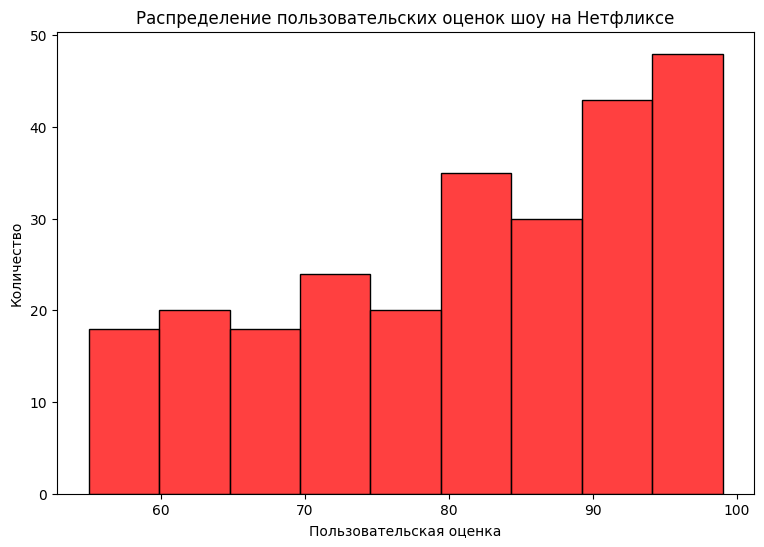

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(
    data_clean['user rating score'],
    color='r'
)
plt.title('Распределение пользовательских оценок шоу на Нетфликсе')
plt.xlabel('Пользовательская оценка')
plt.ylabel('Количество')
plt.show()

In [ ]:
rating_analysis = data_clean.groupby('rating')['user rating score'].agg(['mean', 'count']).round(2)
rating_analysis = rating_analysis.sort_values('count', ascending=False).reset_index().head(10)
rating_analysis

,rating,mean,count
0,TV-14,82.87,77
1,PG,84.10,48
2,TV-MA,84.82,40
3,TV-PG,83.81,21
4,G,74.42,19
5,TV-G,74.36,11
6,PG-13,71.44,9
7,TV-Y,75.00,8
8,TV-Y7-FV,72.75,8
9,R,85.29,7


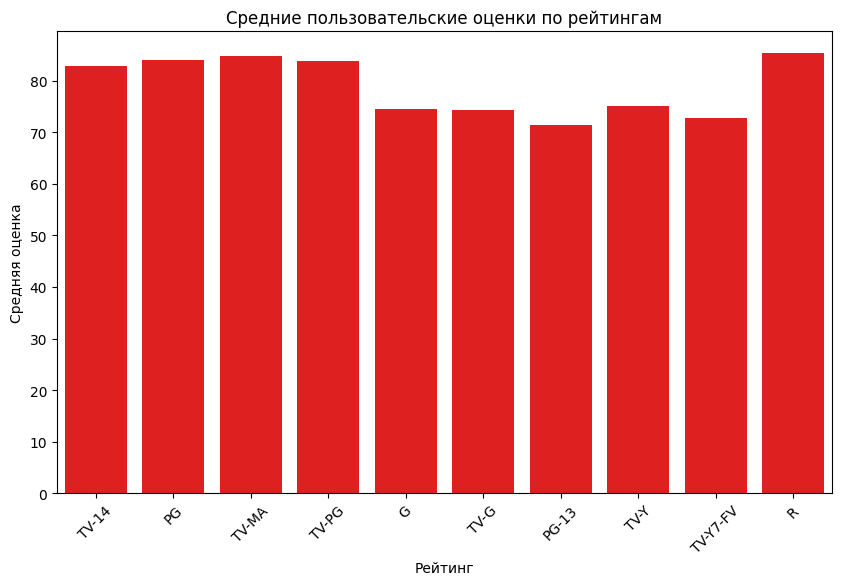

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rating_analysis.reset_index(),
    x='rating',
    y='mean',
    color='r'
    )
plt.title('Средние пользовательские оценки по рейтингам')
plt.xlabel('Рейтинг')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=45)
plt.show()

TV-14 занимает первое место по количеству контента (77 единиц). Это логично, тк Netflix активно производит и лицензирует контент для широкой подростковой и взрослой аудитории.

- Самые высокие оценки получает контент для взрослых (TV-MA, R). Это может быть связано с более лояльной и вовлеченной аудиторией, которая целенаправленно выбирает такой контент и с качественным подбором контента в этих нишах (оригинальные сериалы Netflix, признанная киноклассика и тд).
- Семейный (PG, TV-PG) и подростковый (TV-14) контент держится в середине с хорошими показателями.
- Детский контент (G, TV-G, TV-Y) получает самые низкие оценки. Это может быть связано с тем, что оценки ставят родители, а не дети. Контент для детей часто менее "зрелищный", что может влиять на субъективную оценку.

PG-13 имеет самую низкую среднюю оценку (71.44) при небольшом количестве единиц контента. Возможно, это связано с тем, что выборка слишоком маленькая, и это может искажать реальность. Вполне вероятно, что в выборку просто попали несколько неудачных фильмов.

In [ ]:
data_clean['decade'] = (data_clean['release year'] // 10) * 10
decade_analysis = data_clean.groupby('decade')['user rating score'].mean().round(2).reset_index()
decade_analysis

/tmp/ipython-input-1226763217.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,decade,user rating score
0,1940,61.00
1,1970,86.00
2,1980,68.25
3,1990,78.64
4,2000,79.07
5,2010,82.72


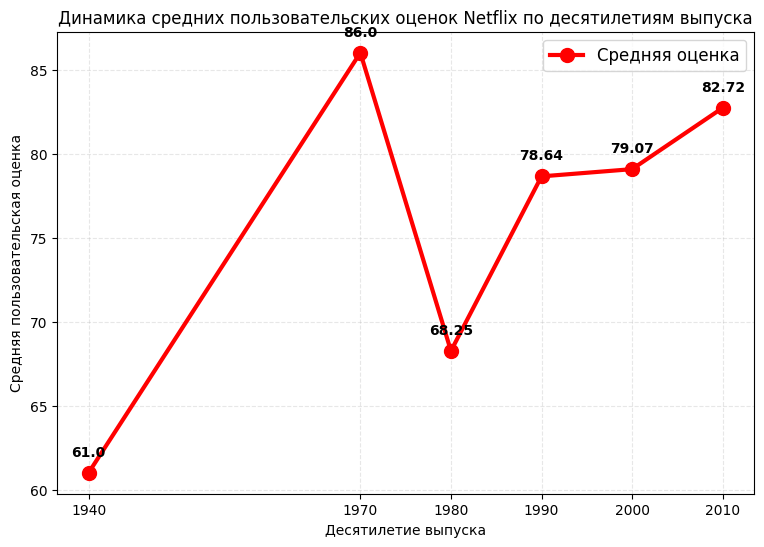

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(decade_analysis['decade'],
         decade_analysis['user rating score'],
         marker='o', markersize=10, linewidth=3, color='r', label='Средняя оценка')

for i, row in decade_analysis.iterrows():
    plt.text(row['decade'], row['user rating score'] + 1,
             f"{row['user rating score']}", ha='center', fontweight='bold')

plt.title('Динамика средних пользовательских оценок Netflix по десятилетиям выпуска')
plt.xlabel('Десятилетие выпуска')
plt.ylabel('Средняя пользовательская оценка')
plt.grid(True, alpha=0.3, linestyle='--')

plt.xticks(decade_analysis['decade'])

plt.legend(fontsize=12)

plt.show()


Пользователи Netflix ставят самые высокие оценки контенту из 1970-х годов (86.00), а самые низкие контенту из 1940-х (61.00). Контент 1940-х, возможно, кажется устаревшим или имеет меньшую культурную ценность для современного зрителя. При этом с 1980-х годов наблюдается устойчивый рост средней оценки. Контент, начиная с 2010-х, также получает высокие оценки, что может отражать улучшение улучшение качества кинопроизводства и актуальность для аудитории. Также можно заметить, что в датасете отсутствуют данные за другие десятилетия, например 30-е и 50-е года.

#### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана?
- Отличаются ли медиана и среднее?
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data_clean['user rating score'].mean()

np.float64(81.3984375)

In [ ]:
data_clean['user rating score'].std()

12.730904096632221

In [ ]:
data_clean['user rating score'].min()

55.0

In [ ]:
data_clean['user rating score'].max()

99.0

In [ ]:
data_clean['user rating score'].median()

83.5

1. Отличаются ли медиана и среднее?

Да, отличаются, но незначительно:

Медиана (83.50) выше среднего (81.40) на 2.10 балла

2. Могут ли данные характеристики значительно отличаться? Почему?

Да, могут.

- Несимметричное распределение: Медиана выше среднего, значит распределение немного скошено влево. Это может быть вызвано экстремально низкими оценками. Можно заметить, что минимум составляет 55.0, и эти низкие значения влияют на среднее.

- Большинство оценок выше среднего: 50% контента имеет оценку выше 83.50 (медиана), но среднее ниже из-за низких оценок

- Оценки в среднем отклоняются от среднего значения на ±12.73 балла. Это довольно большой разброс, что говорит о разнообразии мнений зрителей

**выводы**

- Качество контента высокое: Медиана 83.50 означает, что минимум половина контента оценивается выше 8.35/10
- Есть проблемный контент: Низкие оценки (55.0) указывают на контент, который не нравится большинству. В будущем стоит детально рассмотреть причину низких оценок и при необходимости удалить шоу со стриминга.
- Есть хиты: Высокие оценки (99.0) показывают контент, который почти всем нравится. Стоит также обратить внимание, что это за фильмы

In [ ]:
data_clean_ratings = data_clean.dropna(subset=['user rating score'])

q25 = data_clean['user rating score'].quantile(0.25)
q75 = data_clean['user rating score'].quantile(0.75)

In [ ]:
low_rated = data_clean[data_clean['user rating score'] < q25]
high_rated = data_clean[data_clean['user rating score'] > q75]

Топ-10 фильмов с самыми низкими оценками

In [ ]:
low_top10 = low_rated.sort_values('user rating score').head(10).reset_index()
low_top10

,index,title,rating,ratingLevel,release year,user rating score,decade
0,207,Life Unexpected,TV-PG,Parental guidance suggested. May not be suitab...,2010,55.0,2010
1,710,Curious George,G,General Audiences. Suitable for all ages.,2006,55.0,2000
2,259,Hannah Montana: The Movie,G,General Audiences. Suitable for all ages.,2009,56.0,2000
3,380,Bitten,TV-MA,For mature audiences. May not be suitable for...,2016,56.0,2010
4,667,DreamWorks Shrek's Swamp Stories,TV-PG,Parental guidance suggested. May not be suitab...,2008,56.0,2000
5,594,PokÌ©mon: XY,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2015,56.0,2010
6,253,How to Lose a Guy in 10 Days,PG-13,some sex-related material,2003,56.0,2000
7,23,Hunter X Hunter (2011),NR,This movie has not been rated.,2013,57.0,2010
8,447,The Doctor Blake Mysteries,TV-MA,For mature audiences. May not be suitable for...,2016,57.0,2010
9,774,Brother Bear 2,G,General Audiences. Suitable for all ages.,2006,57.0,2000


Топ-10 фильмов с самыми высокими оценками

In [ ]:
high_top10 = high_rated.sort_values('user rating score', ascending=False).head(10).reset_index()
high_top10

,index,title,rating,ratingLevel,release year,user rating score,decade
0,41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0,2010
1,2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,2010
2,10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0,2010
3,3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,2000
4,25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0,2010
5,64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0,2000
6,27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0,2010
7,8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0,2010
8,62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0,2010
9,63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,2010


#### В какие годы были запущены шоу, представленные в датасете?

самый ранний фильм

In [ ]:
data_clean['release year'].min()

1940

самый поздний фильм

In [ ]:
data_clean['release year'].max()

2017

Диапазон годов шоу, представленных на Нетфликс

In [ ]:
data_clean['release year'].max() - data_clean['release year'].min()

77

Медианный год

In [ ]:
data_clean['release year'].median()

2014.0

Количество уникальных лет выпуска шоу

In [ ]:
data_clean['release year'].nunique()

35

Медианный год 2014 означает, что 50% контента выпущено полсе 2014 года
Медиана близка к максимуму, а не к середине диапазона. Распределение ассиметрично, большинство фильмов на Нетфликсе были выпущены в 21-ом веке.

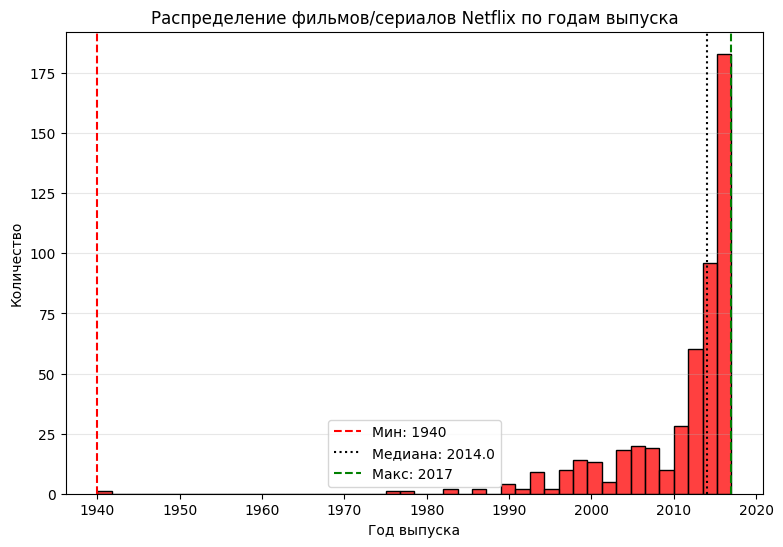

In [ ]:
plt.figure(figsize=(9, 6))

sns.histplot(
    data=data_clean['release year'],
    color='r'
)

plt.axvline(x=data_clean['release year'].min(), color='r', linestyle='--', label=f'Мин: {int(data_clean['release year'].min())}')
plt.axvline(x=data_clean['release year'].median(), color='black', linestyle=':', label=f'Медиана: {data_clean['release year'].median()}')
plt.axvline(x=data_clean['release year'].max(), color='g', linestyle='--', label=f'Макс: {int(data_clean['release year'].max())}')
plt.title('Распределение фильмов/сериалов Netflix по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

**вывод**

Главной особенностью  наполнения стриминга является его современная направленность. Половина всего контента была выпущена после 2014 года, что указывает на основной фокус стриминга на новинках и оригинальном контенте. В то же время Нетфликс не отказывается от классики, имея в каталоге фильмы, выпущенные в 40-х годах.

#### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года.

- Наблюдается ли рост?
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

In [ ]:
yearly_counts = data_clean['release year'].value_counts().reset_index()
yearly_counts.columns = ['year', 'count']
yearly_counts = yearly_counts.sort_values('year')

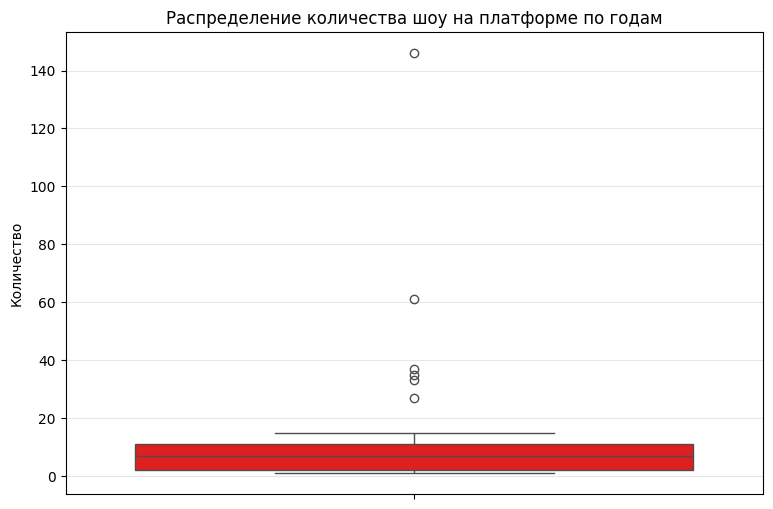

In [ ]:
plt.figure(figsize=(9, 6))

sns.boxplot(data=yearly_counts, y='count', color='r')
plt.title('Распределение количества шоу на платформе по годам')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.3)
plt.show()

выбросы

In [ ]:
Q1 = yearly_counts['count'].quantile(0.25)
Q3 = yearly_counts['count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = yearly_counts[(yearly_counts['count'] < lower_bound) | (yearly_counts['count'] > upper_bound)]
outliers

,year,count
5,2012,27
4,2013,33
3,2014,35
1,2015,61
0,2016,146
2,2017,37


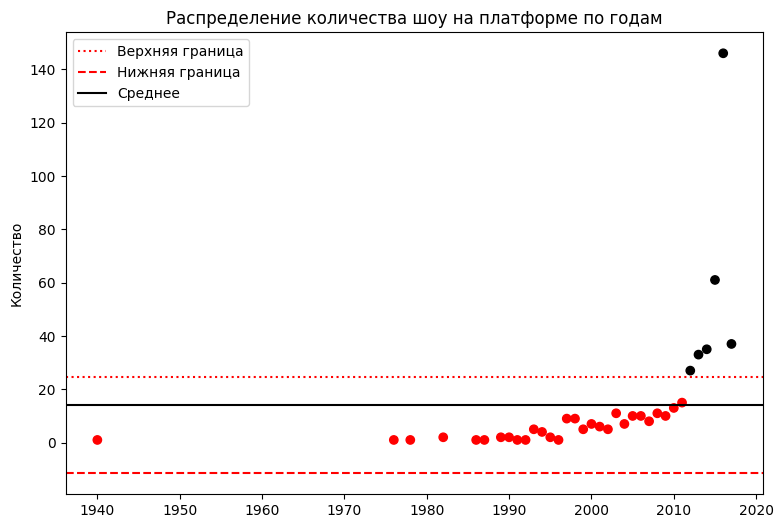

In [ ]:
plt.figure(figsize=(9, 6))

colors = ['black' if year in outliers['year'].values else 'r'
          for year in yearly_counts['year']]

plt.scatter(yearly_counts['year'], yearly_counts['count'], c=colors)
plt.axhline(y=upper_bound, color='r', linestyle=':', label='Верхняя граница')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница')
plt.axhline(y=yearly_counts['count'].mean(), color='black', linestyle='-', label='Среднее')
plt.ylabel('Количество')
plt.legend()
plt.title('Распределение количества шоу на платформе по годам')
plt.show()

Наблюдается положительный тренд в даннных. С течением времени кол-во фильмов увеличивается. При этом стоит обратить внимание на то, что в данных есть выбросы. Наиболее выраженным является 2016 год, на платформе есть 146 фильмов этого года. Выбросами также стали 2012-2017 годы. Статистически они являются выбросами, при этом их появление вполне объяснимо.Период 2012-2017 годов совпадает с развитием Нетфликса и началом производства оригинального контента. В 2013 году стартовали такие проекты, как "House of Cards" и "Orange is the New Black". Пиковый 2016 год, вероятно, отражает максимальные инвестиции в оригинальное производство перед насыщением рынка и появлением серьезных конкурентов.

#### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017.
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
- Как еще можно оценить "Успешность"?



In [ ]:
movies_2016 = data_clean[data_clean['release year'] == 2016]
movies_2017 = data_clean[data_clean['release year'] == 2017]

In [ ]:
mean_2016 = movies_2016['user rating score'].mean()
round(mean_2016, 2)

np.float64(84.31)

In [ ]:
mean_2017 = movies_2017['user rating score'].mean()
round(mean_2017, 2)

np.float64(88.12)

можно еще посмотреть на кол-во выпущенных фильмов

In [ ]:
count_2016 = len(movies_2016)
count_2017 = len(movies_2017)

In [ ]:
count_2016

146

In [ ]:
count_2017

37

In [ ]:
count_2016/count_2017

3.945945945945946

в 2016 было выпущено в 4 раза больше фильмов

Нетфликс выпускает контент нестабильно.

- 2016 год: 146 фильмов/сериалов (пик производства)
- 2017 год: всего 37 единиц контента (-75%)

посмотрим на другие возможные измерения "успешности"

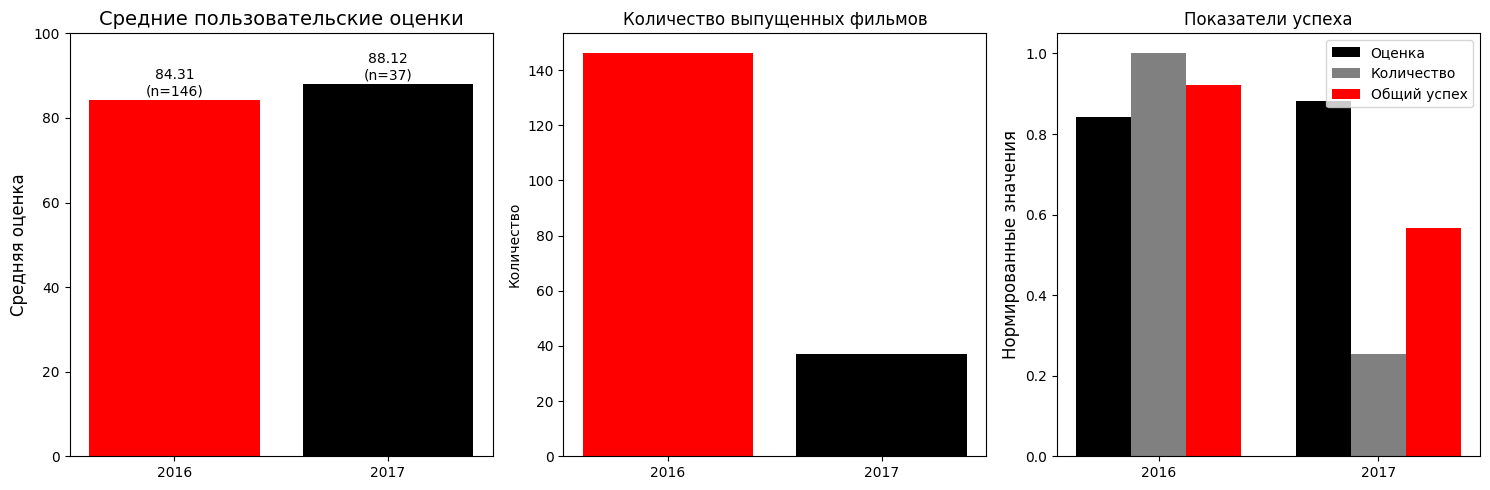

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

years = ['2016', '2017']
means = [mean_2016, mean_2017]
counts = [count_2016, count_2017]

bars = axes[0].bar(years, means, color=['red', 'black'])
axes[0].set_title('Средние пользовательские оценки', fontsize=14)
axes[0].set_ylabel('Средняя оценка', fontsize=12)
axes[0].set_ylim(0, 100)

for bar, mean, count in zip(bars, means, counts):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 1,
                f'{mean:.2f}\n(n={count})', ha='center')

axes[1].bar(years, counts, color=['red', 'black'])
axes[1].set_title('Количество выпущенных фильмов')
axes[1].set_ylabel('Количество')


norm_scores = [mean/100 for mean in means]
max_count = max(counts)
norm_counts = [count/max_count for count in counts]
composite_index = [0.5*ns + 0.5*nc for ns, nc in zip(norm_scores, norm_counts)]
x = np.arange(len(years))
width = 0.25

axes[2].bar(x - width, norm_scores, width, label='Оценка', color='black')
axes[2].bar(x, norm_counts, width, label='Количество', color='grey')
axes[2].bar(x + width, composite_index, width, label='Общий успех', color='red')

axes[2].set_title('Показатели успеха')
axes[2].set_xticks(x)
axes[2].set_xticklabels(years)
axes[2].set_ylabel('Нормированные значения', fontsize=12)
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
t_stat, p_value = stats.ttest_ind(movies_2016['user rating score'].dropna(), movies_2017['user rating score'].dropna(), equal_var=False)

p_value

np.float64(0.1445052299709164)

p-value > 0.05, принимается нулевая гипотеза об отсутствии значимой разницы между оценками. Нельзя утверждать, что один год "успешнее" другого, базируясь на пользовательских оценках

In [ ]:
total_movies = count_2016 + count_2017

diff_pct = abs(count_2017 - count_2016) / max(count_2016, count_2017) * 100
observed = np.array([[count_2016], [count_2017]])

expected_50_50 = total_movies / 2
expected = np.array([[expected_50_50], [expected_50_50]])

chi2_stat = np.sum((observed - expected) ** 2 / expected)
p_value_counts = 1 - stats.chi2.cdf(chi2_stat, df=1)
p_value_counts

np.float64(7.771561172376096e-16)

p-value < 0.05, отвергается нулевая гипотеза об отсутствии различий. По количеству выпущенных фильмов 2016 год значимо успешнее.

На основе этих данных можно сделать вывод, что 2016 год был успешнее. Это можно видеть и по нашему индексу "успеха" (см. 3 график).

Однако! Стоит посмотреть и на внешние данные. Ниже представлена таблица из ежегодного отчета Нетфликс. https://ir.netflix.net/financials/annual-reports-and-proxies/default.aspx

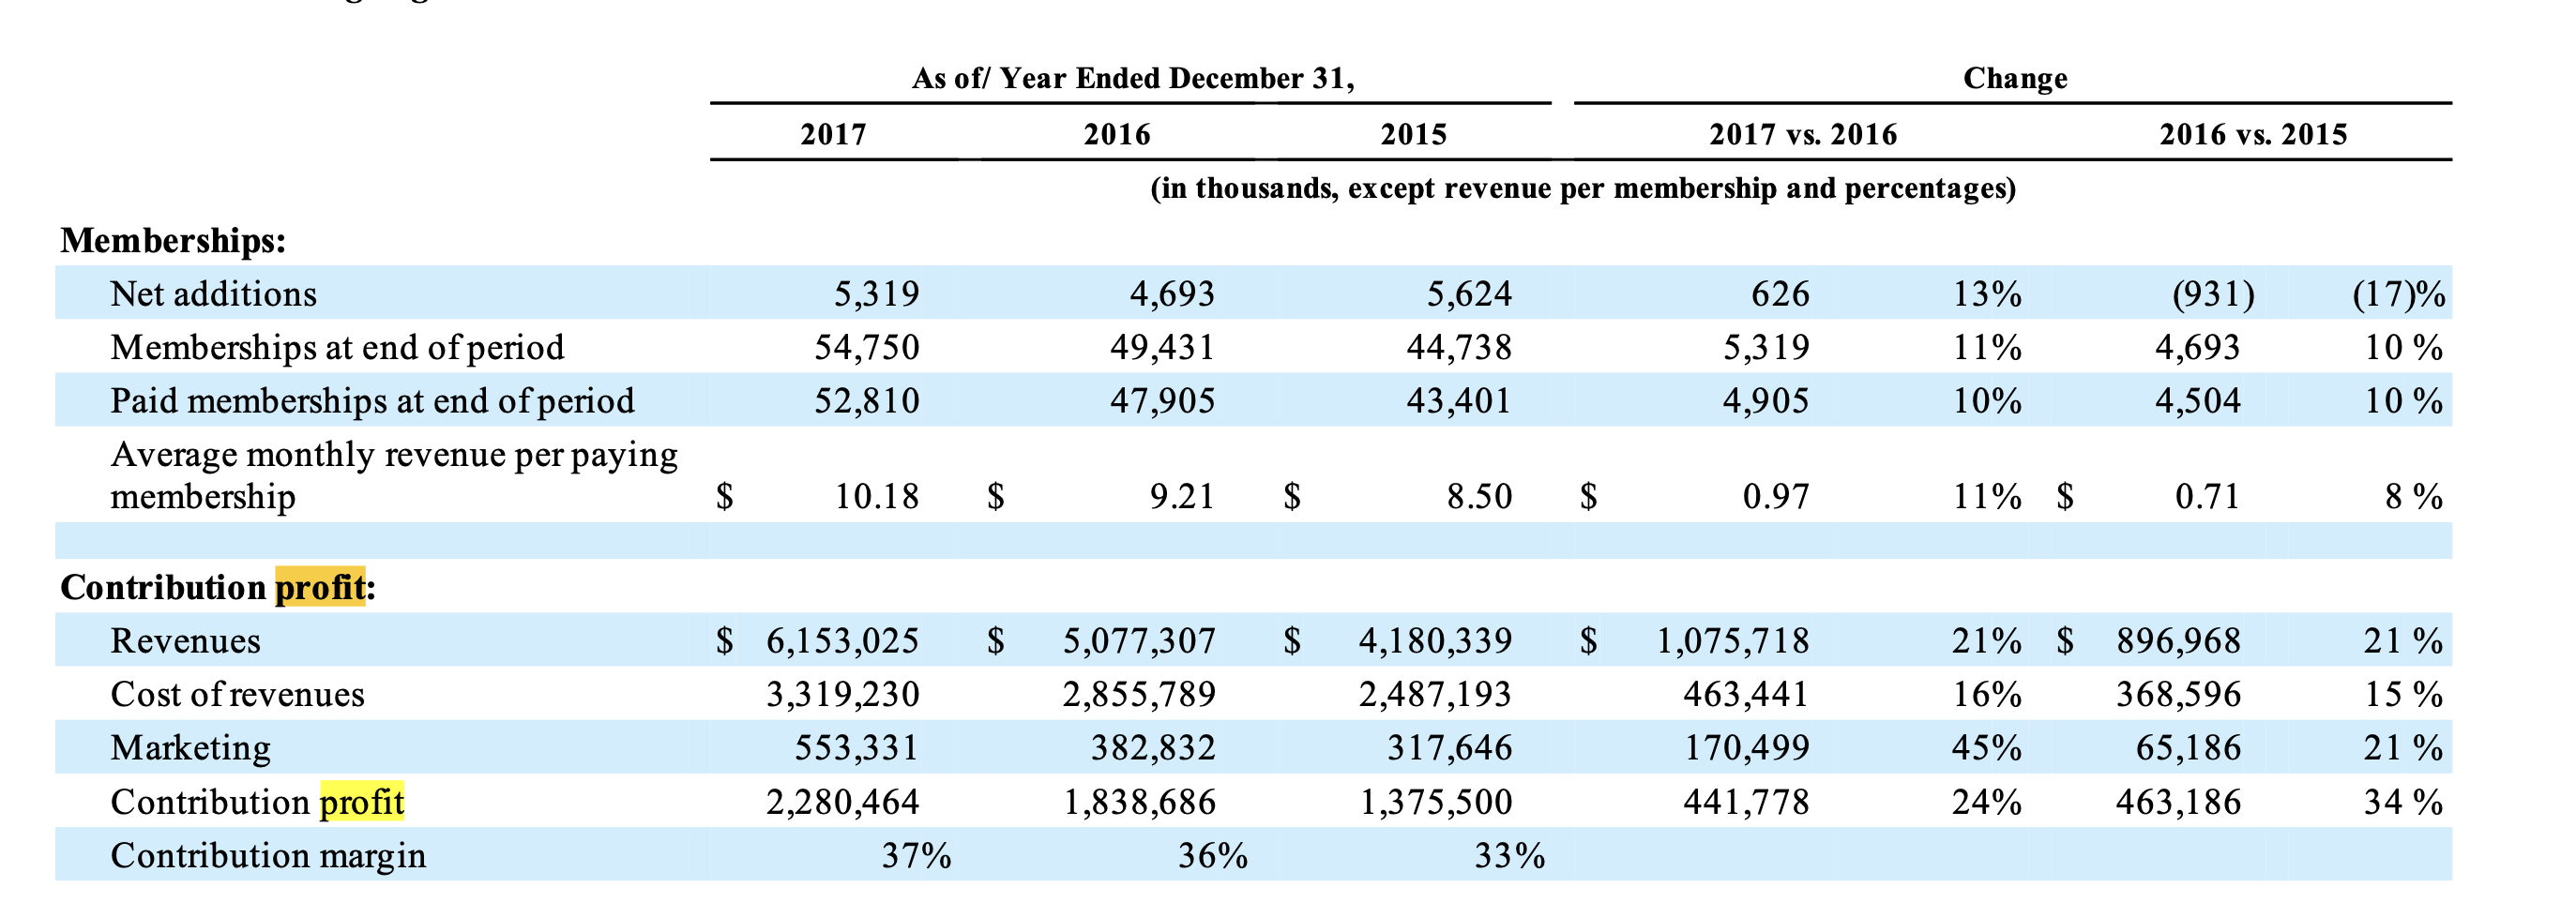


**2017 год был успешнее 2016 года.**
Компания продемонстрировала рост по всем показателям: количество подписчиков росло быстрее, а главное — увеличивался их ARPU. К тому же, по сравнению с 2016 выросла как абсолютная сумма операционной прибыли, так и маржинальность.

Причиной успеха называют масштабные инвестиции в оригинальный контент. В 2016 году на производство сериалов, таких как «Корона», «Люк Кейдж» и «Очень странные дела» было направлено более 5 млрд долларов. Скорее всего, в 2017 году "окупились" вложения, сделанные годом ранее.


https://www.wired.com/story/netflix-2016-earnings-revenue-original-shows/#:~:text=A%20year%20ago%20Netflix%20added,the%20extra%20demand%2C%20Netflix%20said.

In [ ]:
import plotly.express as px

rating_counts = data_clean['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

total_count = rating_counts['count'].sum()
rating_counts['percentage'] = (rating_counts['count']/total_count * 100).round(1)

fig = px.treemap(rating_counts, path=['rating'], values='percentage', title='Percentage of Netflix Shows by Rating Group', width=700, height=400)

fig.update_traces(textinfo='label+value', texttemplate='%{label}<br>%{value:.2f}%')

fig.show()

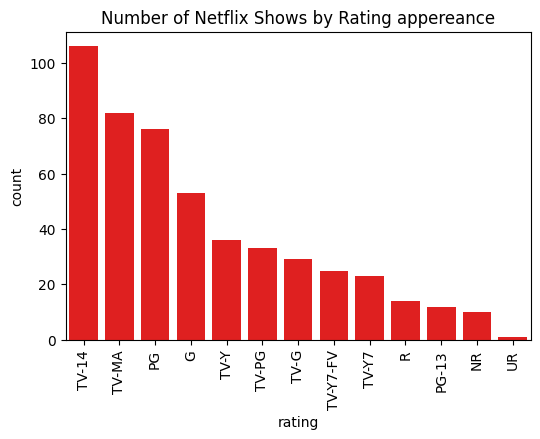

In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(data=data_clean,
              x='rating',
              color = 'r',
              order=data_clean['rating'].value_counts().index)

plt.title('Number of Netflix Shows by Rating appereance')
plt.xticks(rotation=90)

plt.show()

Приведена в двух вариантах визуализация :) <br>
**В числе самых выпускаемых шоу/сериалов на Нетфликсе - TV-14, TV-MA и PG**

In [ ]:
tv_data = data_clean[data_clean['rating'].isin(['TV-14'])]
tv_data.head(5)

,title,rating,ratingLevel,release year,user rating score,decade
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,2010
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,2000
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0,2010
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0,2010
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0,2010


In [ ]:
year_count = tv_data['release year'].value_counts().reset_index()
year_count.sort_values('release year')
year_count.columns = ['release year', 'count']

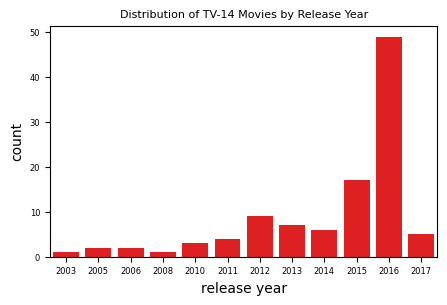

In [ ]:
plt.figure(figsize=(5, 3))

sns.barplot(data=year_count,
            x='release year',
            y='count',
            color= 'r')

plt.title('Distribution of TV-14 Movies by Release Year', fontsize=8)
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=6)

plt.show()

**Большая часть шоу/сериалов рейтинга TV-14 была выпущена в 2016 году. Но мы видим, что  в 17 году ситуация сильно поменялась**

In [ ]:
data_stackbar = data_clean[data_clean['release year'].between(2013, 2017)]
rating_counts = data_stackbar.groupby('release year')['rating'].value_counts()
top_3 = rating_counts.groupby(level=0).head(3)

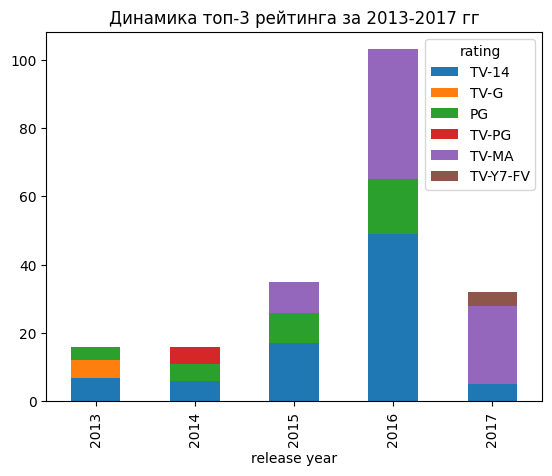

In [ ]:
(top_3.unstack(fill_value=0)
     .plot(kind='bar', stacked=True))

plt.title('Динамика топ-3 рейтинга за 2013-2017 гг')
plt.show()

**Анализ динамики показывает, что рейтинг TV‑14 традиционно лидирует по количеству выпускаемых шоу. Исключение составляет неполный 2017 год, когда первенство перешло к рейтингу TV‑MA. Это свидетельствует о смещении фокуса Netflix в сторону взрослой аудитории. <br> При этом статистически значимой разницы в средних оценках между 2016 и 2017 годами не выявлено, следовательно, изменение возрастной структуры контента не повлияло на пользовательские оценки.**



Как формируются оценки?

In [ ]:
#мтрица корреляция, лин регрессия...

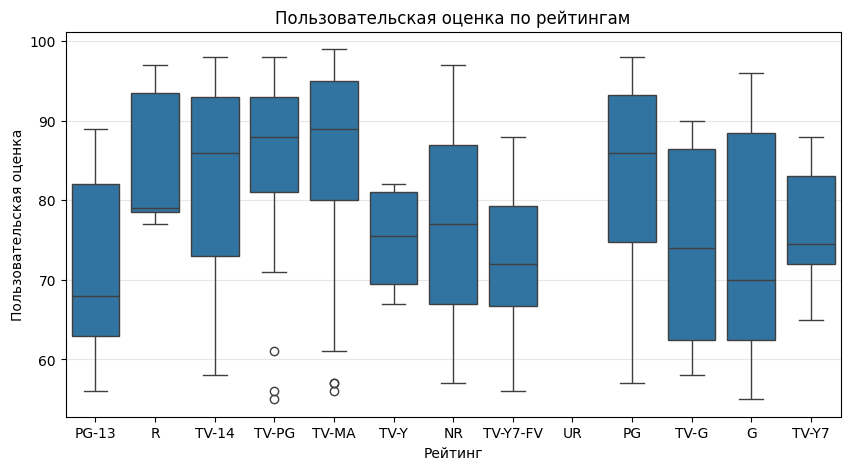

In [ ]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=data_clean,
    x='rating',
    y='user rating score'
)

plt.title('Пользовательская оценка по рейтингам')
plt.xlabel('Рейтинг')
plt.ylabel('Пользовательская оценка')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [ ]:
sig_matrix = pd.DataFrame(index=ratings, columns=ratings)

for r1 in data_clean['rating'].dropna().unique():
    for r2 in data_clean['rating'].dropna().unique():
        g1 = data_clean.loc[data_clean['rating'] == r1, 'user rating score'].dropna()
        g2 = data_clean.loc[data_clean['rating'] == r2, 'user rating score'].dropna()

        _, p = stats.ttest_ind(g1, g2, equal_var=False)
        sig_matrix.loc[r1, r2] = round(p, 4)

sig_matrix

/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



,PG-13,R,TV-14,TV-PG,TV-MA,TV-Y,NR,TV-Y7-FV,UR,PG,TV-G,G,TV-Y7
PG-13,1.0,0.0165,0.0172,0.0183,0.0081,0.4298,0.828,0.806,NaN,0.0103,0.5985,0.5655,0.3477
R,0.0165,1.0,0.5294,0.7453,0.9094,0.0281,0.7502,0.0251,NaN,0.7607,0.0517,0.0368,0.1018
TV-14,0.0172,0.5294,1.0,0.7721,0.4293,0.0088,0.8183,0.0273,NaN,0.565,0.0624,0.0311,0.141
TV-PG,0.0183,0.7453,0.7721,1.0,0.7749,0.0221,0.7913,0.0289,NaN,0.9296,0.0662,0.043,0.1352
TV-MA,0.0081,0.9094,0.4293,0.7749,1.0,0.0032,0.7626,0.0129,NaN,0.781,0.0308,0.0135,0.0731
TV-Y,0.4298,0.0281,0.0088,0.0221,0.0032,1.0,0.9366,0.603,NaN,0.0039,0.889,0.8874,0.7271
NR,0.828,0.7502,0.8183,0.7913,0.7626,0.9366,1.0,0.8671,NaN,0.7828,0.9169,0.9186,0.9841
TV-Y7-FV,0.806,0.0251,0.0273,0.0289,0.0129,0.603,0.8671,1.0,NaN,0.0165,0.7656,0.7402,0.473
UR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG,0.0103,0.7607,0.565,0.9296,0.781,0.0039,0.7828,0.0165,NaN,1.0,0.038,0.0164,0.0905


**Анализ пользовательских оценок показывает устойчивую тенденцию:
контент, ориентированный на подростковую и взрослую аудиторию (TV-MA, TV-14, TV-PG, R), в среднем получает более высокие пользовательские оценки, чем контент с детскими возрастными рейтингами (TV-Y, TV-Y7, TV-G, G). <br>Попарные статистические тесты подтверждают, что эти различия не являются случайными и статистически значимы.**

При этом важно отметить, что внутри одной возрастной группы (например, TV-MA vs TV-14) различия в оценках, как правило, не значимы. Это указывает на то, что возможно ключевым фактором является целевая аудитория контента, а не конкретный  рейтинг. То есть, взрослый и более сложный по тематике контент в целом воспринимается пользователями лучше.

С учётом успешных показателей 2017 года и выявленных предпочтений пользователей, инвестиции в оригинальный контент для взрослой аудитории дает рост бизнесу.

## Критерии оценки проекта

- Какие существуют признаки, не представленные в данных, но существенно влияющие на имеющиеся признаки?
- Как формируются оценки?
- Каким образом собирались сами данные?


Оценка за групповой проект выставляется исходя из 5 критериев ниже. Первые четыре критерия позволяют набрать максимальные 6 баллов, пятый - добрать два бонусных балла. Также комиссия на своё усмотрение может добавить (но не снизить) некоторое количество бонусных баллов за рамками данных критериев. При этом на оценку по каждому критерию может повлиять уровень презентации проекта на защите.


### Критерий 1. Информативность техническая – необходимо выявить нетривиальные зависимости и тенденции в данных (до 1,5 баллов)

Данный критерий оценивает, насколько вы продвинулись технически с точки зрения выявления каких-то паттернов, тенденций и зависимостей в данных. Чем более сложные инструменты вы примените в ходе выполнения проекта и чем более сложные и нетривиальные зависимости получите, тем выше будет оценка у вашей команды по данному критерию!

### Критерий 2. Информативность аналитическая – необходимо интерпретировать данные и делать выводы полезные для бизнеса  (до 1,5 баллов)

Данный критерий оценивает прикладной смысл проделанных вами действий, интерпретацию технических инструментов, умение подсветить полезность и значимость полученных выводов с точки зрения бизнеса, умение переложить полученные результаты на исходные бизнес-цели и "продать" то, что вы сделали.


### Критерий 3. Визуализация – оценивается техническое исполнение графиков (до 2 баллов)

Данный критерий оценивает сложность и техничность ваших визуализаций. Визуализации должны быть наглядными, красивыми, понятными, легко-интерпертируемыми, нетривиальными с точки зрения технического исполнения и выводов, которые они несут в себе.


*Максимальный балл по данному критерию (**2 балла**) нельзя получить, если в работе используются лишь базовые библиотеки визуализаций: Matplotlib и Seaborn*

### Критерий 4. Предобработка датасета – очистка/замена данных (до 1 балла)

Данный критерий оценивает полноту всех проделанных действий с точки зрения подготовки данных и первичной предобработки датасета.


### Критерий 5. Обогащение данными – добавление новых признаков/датасетов (БОНУС, 2 балла)

Данный критерий оценивает полноту использования средств feature engineering на основе имеющихся данных, а также средств обогащения данных путем дополнения имеющегося датасета значимой информацией из связанных сторонних датасетов, различных внешних ресурсов и других источников. Обратите внимание, что связанная информация извне не должна замещать или подменять собой исходную задачу и исходные данные в представленном датасете, а должна лишь дополнять и обогощать его. Корректность и глубина проработки взаимодействия со внешними ресурсами и оценивается в рамках данного критерия!

*По данному критерию можно получить **2 балла** только при условии корректной и значимой работы с как минимум одним источником внешних данных (внешним датасетом), а также при условии наличия как минимум одного примера валидного и осмысленного применения средств feature engineering*